# Análisis Exploratorio de Datos: Clasificación de la Calidad del Vino

## Introducción

¡Bienvenido a este notebook de análisis para un problema de **clasificación**! A diferencia de la regresión (predecir un número) o el clustering (agrupar), en la clasificación nuestro objetivo es predecir una categoría o clase.

En este caso, analizaremos un conjunto de datos sobre las características fisicoquímicas del vino tinto y trataremos de entender qué factores influyen en su `calidad`, que es una puntuación de 3 a 8.

**Dataset:** Usaremos el archivo `WineQT.csv`. Cada fila representa un vino y cada columna una de sus propiedades (acidez, azúcar, alcohol, etc.).

## Paso 1: Preparación del Entorno de Trabajo

Como buena práctica, primero detectamos si estamos trabajando en Google Colab para descargar y organizar los datos automáticamente.

In [1]:
# Propósito: Verificar si el notebook se está ejecutando en Google Colab.

# Explicación del código:
# Se intenta importar la librería 'google.colab'. Si tiene éxito, la variable IN_COLAB
# se establece en True. Si falla, se establece en False.

try:
    import google.colab
    IN_COLAB = True
    print("Entorno de Google Colab detectado.")
except:
    IN_COLAB = False
    print("Entorno local (o diferente a Colab) detectado.")

Entorno de Google Colab detectado.


In [2]:
# Propósito: Si estamos en Google Colab, descargar y preparar los datos desde GitHub.

if IN_COLAB:
    print("Descargando y preparando los datos para Colab...")
    # Descargamos el repositorio como un archivo .zip
    !wget -O datasets.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
    # Descomprimimos el archivo en modo silencioso (-q)
    !unzip -q datasets.zip
    # Movemos la carpeta de datasets a una nueva ubicación
    !mv CienciaDatos-MASDI-main/datasets ./datasets_github
    # Limpiamos los archivos temporales
    !rm -rf datasets.zip CienciaDatos-MASDI-main
    print("Datos listos.")

Descargando y preparando los datos para Colab...
--2025-10-02 23:00:27--  https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/DiegoPaezA/CienciaDatos-MASDI/zip/refs/heads/main [following]
--2025-10-02 23:00:27--  https://codeload.github.com/DiegoPaezA/CienciaDatos-MASDI/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘datasets.zip’

datasets.zip            [  <=>               ]   4.65M  12.3MB/s    in 0.4s    

2025-10-02 23:00:28 (12.3 MB/s) - ‘datasets.zip’ saved [4873376]

Datos listos.


## Paso 2: Carga de Datos en un DataFrame

Ahora, importaremos las librerías necesarias y cargaremos el archivo `WineQT.csv` en un DataFrame de `pandas`. También daremos un primer vistazo a la estructura de los datos.

In [3]:
# Propósito: Importar librerías y cargar el dataset en un DataFrame.

# Instrucciones: Si trabajas localmente, asegúrate de que la carpeta 'datasets'
# esté en la ubicación correcta.

# Librerías a importar:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Construcción de la ruta del archivo:
dir_root = os.getcwd()
datasets_folder_name = 'datasets_github' if IN_COLAB else 'datasets'
# Nota que ahora accedemos a la subcarpeta 'classification' y al archivo 'WineQT.csv'.
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'classification', 'WineQT.csv')

# Carga del dataset en el DataFrame 'data':
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas para una verificación rápida:
# Esto nos permite ver los nombres de las columnas y el tipo de valores que contienen.
print("Datos cargados. Estas son las primeras 5 filas:")
data.head()

Datos cargados. Estas son las primeras 5 filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Paso 3: Análisis Exploratorio de Datos (EDA)

Comenzamos a investigar las características del dataset.

### 3.1 Información General del DataFrame

Un resumen técnico nos dirá el tamaño, tipos de datos y si hay valores nulos.

In [4]:
# Propósito: Obtener un resumen técnico del DataFrame.
# Parámetros: Ninguno.

data.info()

# --- Interpretación de los Resultados ---
# RangeIndex: 1143 entries -> Tenemos 1143 registros (vinos) y 13 columnas.
# Columns: Todas las columnas son numéricas ('float64' o 'int64'). Esto facilita el análisis inicial,
#          ya que no tenemos variables de texto que necesitemos convertir.
# Non-Null Count: Todas las columnas tienen 1143 valores no nulos. ¡El dataset está completo!
# Variable Objetivo: 'quality' es la variable que queremos predecir (nuestra "target").
# Columna irrelevante: 'Id' es un identificador y no aporta información para predecir la calidad. Deberíamos eliminarla antes de entrenar un modelo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### 3.2 Estadísticas Descriptivas

Las estadísticas descriptivas nos dan una idea de la escala y distribución de cada propiedad del vino.

In [5]:
# Propósito: Generar estadísticas descriptivas para las columnas numéricas.
# Parámetros: Ninguno.

data.describe()

# --- Interpretación de los Resultados ---
# quality: La calidad va de 3 (mínima) a 8 (máxima), con una media de 5.65. Esto sugiere que la mayoría de los vinos son de calidad promedio.
# alcohol: El contenido de alcohol varía entre 8.4% y 14.9%.
# Escalas: Observa que las escalas son muy diferentes. Por ejemplo, 'total sulfur dioxide' (media ~46) tiene valores mucho más grandes que 'chlorides' (media ~0.08).
#          Esto nos indica que, para muchos modelos de machine learning, será necesario escalar los datos.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### 3.3 Distribución de la Variable Objetivo (`quality`)

En un problema de clasificación, es fundamental analizar la distribución de la variable objetivo. Queremos saber cuántos ejemplos tenemos de cada clase.

**Concepto Clave: Desbalance de Clases**
Si una clase tiene muchos más ejemplos que otras, decimos que el dataset está desbalanceado. Esto puede ser un problema, ya que un modelo podría aprender a predecir siempre la clase mayoritaria e ignorar las minoritarias, aunque estas sean importantes.

Conteo de vinos por categoría de calidad:
quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


/tmp/ipython-input-9194320.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=data, palette='viridis')


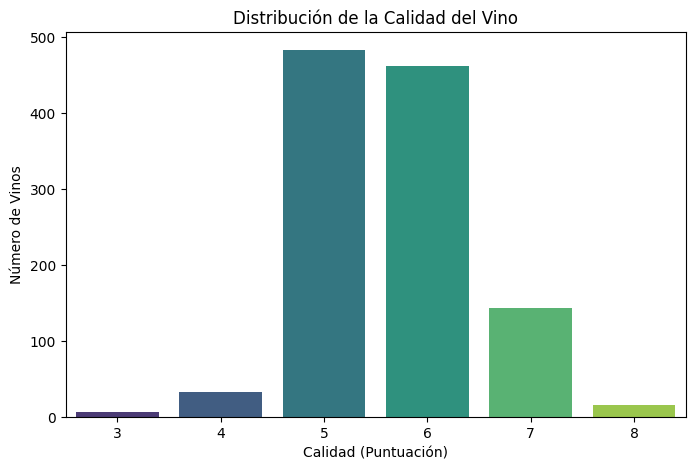

In [6]:
# Propósito: Contar y visualizar la distribución de la variable 'quality'.

# 1. Contar las ocurrencias de cada categoría de calidad.
# - 'data['quality'].value_counts()': Cuenta cuántas veces aparece cada valor único en la columna.
quality_counts = data['quality'].value_counts()
print("Conteo de vinos por categoría de calidad:")
print(quality_counts)

# 2. Crear un gráfico de barras para visualizar el conteo.
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, palette='viridis')
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad (Puntuación)")
plt.ylabel("Número de Vinos")
plt.show()

# --- Interpretación de los Resultados ---
# ¡Tenemos un claro desbalance de clases!
# - Clases mayoritarias: Las calidades 5 (483 vinos) y 6 (462 vinos) dominan el dataset.
# - Clases minoritarias: Hay muy pocos vinos de calidad 3 (6), 4 (33) y 8 (16).
# Esto es un hallazgo crítico. Un modelo entrenado con estos datos podría tener dificultades para
# identificar correctamente los vinos de muy baja o muy alta calidad.

### 3.4 Correlación entre Variables

Ahora, investiguemos la relación lineal entre las diferentes características del vino y, sobre todo, su relación con la `calidad`.

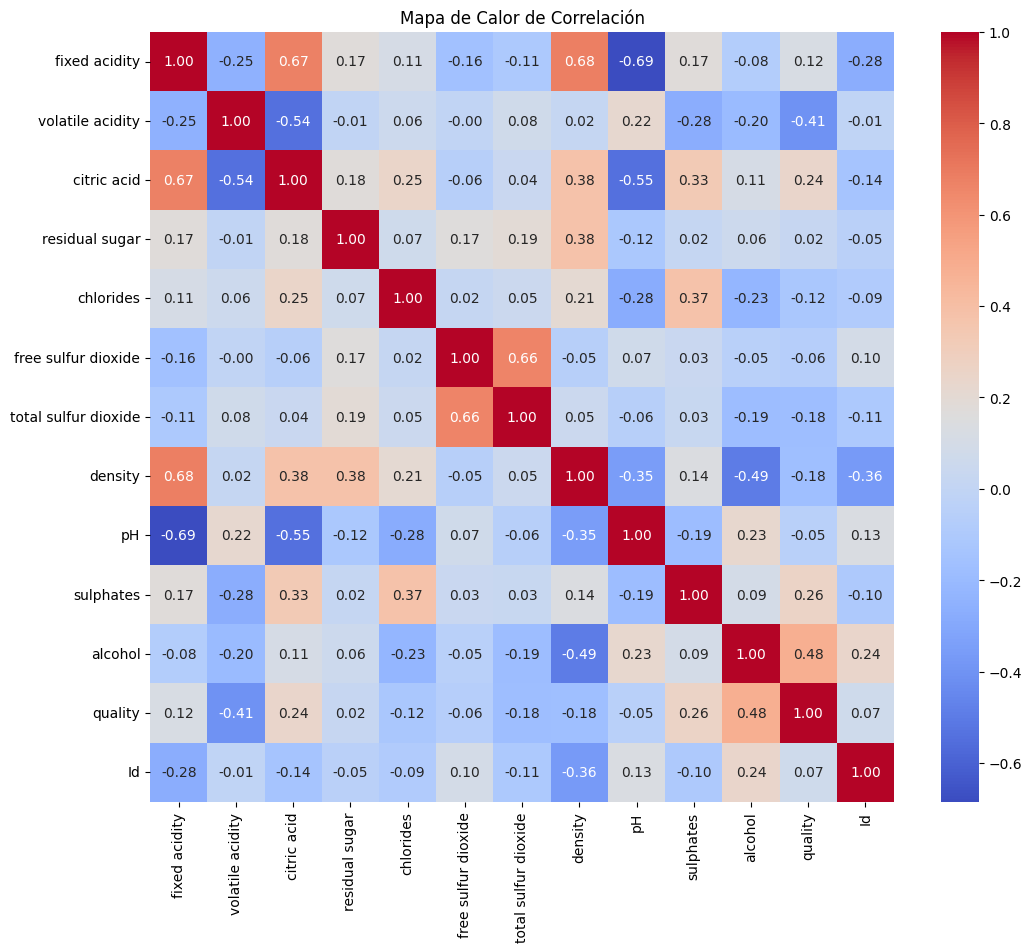

In [7]:
# Propósito: Visualizar la matriz de correlación en un mapa de calor.

# 1. Calcular la matriz de correlación.
#    Como todas las columnas son numéricas, podemos aplicarlo directamente.
correlation_matrix = data.corr()

# 2. Crear el gráfico. Haremos la figura más grande para que sea legible.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor de Correlación")
plt.show()

# --- Interpretación de los Resultados ---
# Buscando la fila/columna 'quality', vemos las correlaciones más importantes:
# - Correlación Positiva Fuerte: 'alcohol' (0.47) es el predictor positivo más fuerte. A mayor alcohol, mayor tiende a ser la calidad.
# - Correlaciones Positivas Moderadas: 'sulphates' (0.29) y 'citric acid' (0.21) también se relacionan positivamente con la calidad.
# - Correlación Negativa Fuerte: 'volatile acidity' (-0.40) es el predictor negativo más fuerte. A mayor acidez volátil, menor tiende a ser la calidad.
# - Otras correlaciones: `fixed acidity` y `citric acid` están fuertemente correlacionadas entre sí (0.69), lo cual es de esperar químicamente.

### 3.5 Distribución de Todas las Variables Numéricas

Finalmente, generemos histogramas para todas las variables para tener una idea visual de su distribución.

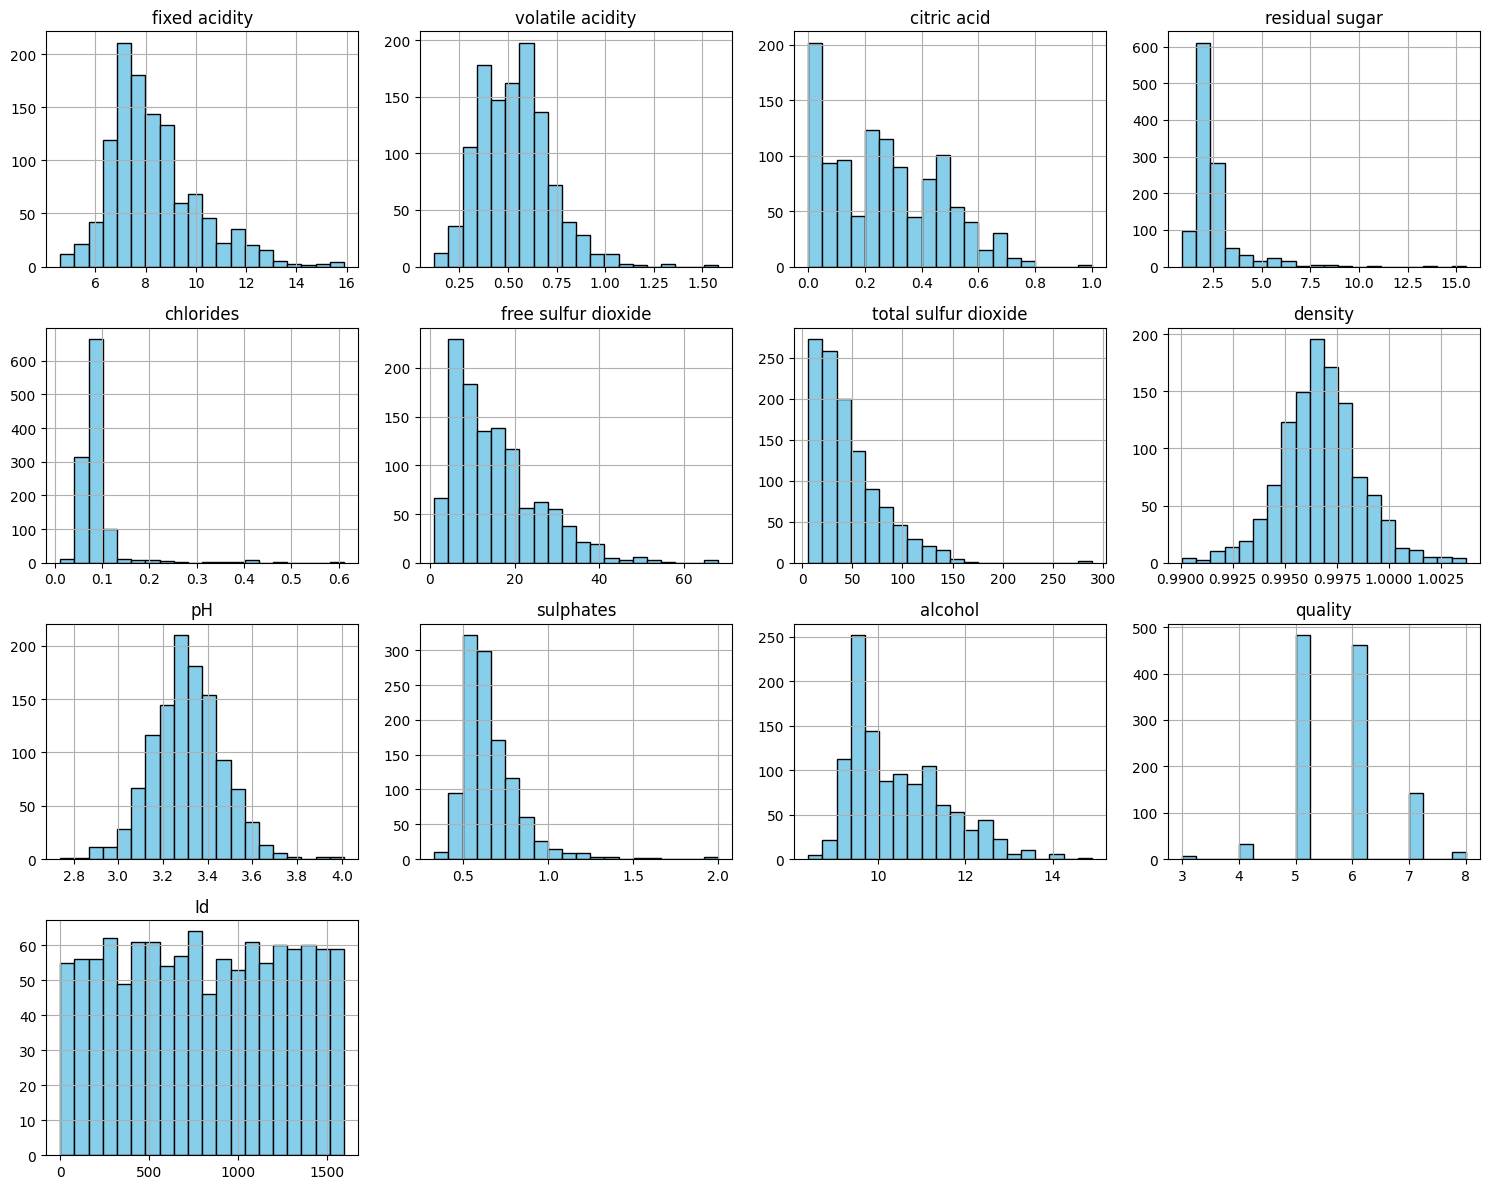

In [8]:
# Propósito: Crear un histograma para cada variable para visualizar su distribución.
# Parámetros: 'figsize' ajusta el tamaño total para una mejor visualización.

data.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout() # Ajusta automáticamente los gráficos para que no se superpongan.
plt.show()

# --- Interpretación de los Resultados ---
# - Sesgo (Skewness): Muchas variables como 'fixed acidity', 'residual sugar', 'chlorides', y 'free sulfur dioxide' están sesgadas hacia la derecha.
# - Distribución Normal: 'density' y 'pH' se asemejan a una distribución normal (forma de campana).
# - Alcohol: Muestra una concentración en valores más bajos.
# - Id: El histograma de 'Id' no tiene significado analítico, es solo un identificador secuencial.

## Conclusiones del Análisis y Próximos Pasos

Este análisis exploratorio nos ha revelado información fundamental para nuestro problema de clasificación:

1.  **Datos de Alta Calidad:** El dataset está limpio, sin valores faltantes. Todas las variables son numéricas.
2.  **Desbalance de Clases:** La variable objetivo, `quality`, está muy desbalanceada. La mayoría de los vinos son de calidad media (5 y 6), y las clases de alta y baja calidad son muy raras. Este es el principal desafío a tener en cuenta.
3.  **Principales Predictores:** El `alcohol` es el indicador positivo más fuerte de una alta calidad, mientras que la `volatile acidity` es el indicador negativo más fuerte.
4.  **Distribución de Características:** Muchas de las características químicas presentan distribuciones sesgadas, lo que podría requerir transformaciones (como la logarítmica) para algunos tipos de modelos.

**Sugerencias para el próximo paso:**

* **Preprocesamiento:**
    * Eliminar la columna `Id`, ya que no es una característica predictiva.
    * Considerar estrategias para manejar el desbalance de clases, como agrupar las clases minoritarias (por ejemplo, agrupar calidades 3 y 4 como "baja", 5 y 6 como "media", y 7 y 8 como "alta").
    * Escalar las características para que tengan un rango similar, lo cual es importante para muchos algoritmos.
* **Modelado:** Dividir los datos en conjuntos de entrenamiento y prueba para construir y evaluar un modelo de clasificación (ej. Regresión Logística, Árboles de Decisión, Random Forest, etc.).

¡Hemos sentado una base sólida para construir un modelo que pueda clasificar la calidad del vino! ¿Te gustaría que exploremos alguna de estas sugerencias?